In [ ]:
# https://www.kaggle.com/code/deepakmys/riiid-eda-with-dask
# https://docs.dask.org/en/stable/dataframe.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/MyDrive/00_data_full"

full_calcularis_events.csv    full_calcularis_users.csv
full_calcularis_subtasks.csv


In [ ]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import dask.dataframe as dd
import dask

# from dask.distributed import Client

# client = Client("tcp://127.0.0.1:46321")
# client

DATA_DIR = '/content/drive/MyDrive/00_data_full'

# users = pd.read_csv('{}/full_calcularis_users.csv'.format(DATA_DIR), index_col=0)
# events = pd.read_csv('{}/full_calcularis_events.csv'.format(DATA_DIR), index_col=0)
# subtasks = pd.read_csv('{}/full_calcularis_subtasks.csv'.format(DATA_DIR), index_col=0)

users = dd.read_csv('{}/full_calcularis_users.csv'.format(DATA_DIR))
events = dd.read_csv('{}/full_calcularis_events.csv'.format(DATA_DIR))
subtasks = dd.read_csv('{}/full_calcularis_subtasks.csv'.format(DATA_DIR), dtype={'availableNumbers': 'object',
       'interval': 'object',
       'numberRepresentations': 'object',
       'solutionRepresentation': 'object'})


In [ ]:
users.country.value_counts().compute()

CH    28964
NL    12106
DE     4407
CA     1586
SE      515
FR      285
AT      274
GB      183
US      154
NO       96
BE       60
ES       45
RU       45
TR       41
IT       11
BR        6
Name: country, dtype: int64

In [ ]:
users_per_country = users.country.value_counts().compute()

In [ ]:
def my_autopct(pct):
    return ('%.0f' % pct) +'%' if pct > 2 else ''

In [ ]:
labels = list(users_per_country.index[:4])
labels.extend(([""] * 5))
labels.extend(["Other"])
labels.extend(([""] * 6))

Text(0.5, 1.0, 'Percent of users by country')

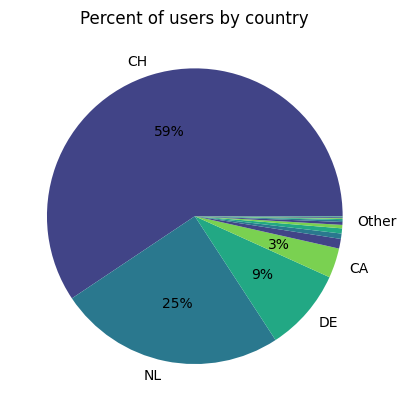

In [ ]:
sns.set_palette('viridis', n_colors=4)
plt.pie(users_per_country, labels=labels, autopct=my_autopct)
plt.title("Percent of users by country")

In [ ]:
print(f"There are {len(users)} users in the data with {len(users[users['start'].isna() == 1])} nans")


There are 64932 users in the data with 0 nans


In [ ]:
users.info(buf=None, verbose=True, memory_usage=True)

<class 'dask.dataframe.core.DataFrame'>
RangeIndex: 64932 entries, 0 to 64931
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   user_id            64932 non-null      int64
 1   learning_time_ms   64932 non-null      int64
 2   logged_in_time_ms  64932 non-null      int64
 3   language           64504 non-null      object
 4   country            48778 non-null      object
 5   start              64932 non-null      object
 6   end                64932 non-null      object
dtypes: object(4), int64(3)
memory usage: 3.5 MB


In [ ]:
events.info(buf=None, verbose=True, memory_usage=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 2185200 entries, 0 to 115044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   event_id          2185200 non-null      int64
 1   user_id           2185200 non-null      int64
 2   mode              2153208 non-null      object
 3   game_name         2153208 non-null      object
 4   learning_time_ms  2153208 non-null      float64
 5   subtasks          2153208 non-null      object
 6   number_range      2153208 non-null      object
 7   start             2185200 non-null      object
 8   end               2164557 non-null      object
 9   skill_id          2153208 non-null      float64
10   type              2185200 non-null      object
dtypes: object(7), float64(2), int64(2)
memory usage: 183.4 MB


In [ ]:
user_event_counts = events.user_id.value_counts()

In [ ]:
user_event_counts.compute()

18091    927
6695     818
42941    781
54637    720
23709    617
        ... 
35917      1
47601      1
19010      1
6157       1
25353      1
Name: user_id, Length: 60404, dtype: int64

In [ ]:
user_ids_over_20_events = user_event_counts[user_event_counts >=20]
user_ids_over_20_events = list(user_ids_over_20_events.index)

In [ ]:
users_over_20_events = users[users['user_id'].isin(user_ids_over_20_events)]

In [ ]:
users_ch = list(users_over_20_events.query("country == 'CH'")["user_id"])
users_nl = list(users_over_20_events.query("country == 'NL'")["user_id"])
users_de = list(users_over_20_events.query("country == 'DE'")["user_id"])
users_ca = list(users_over_20_events.query("country == 'CA'")["user_id"])

In [ ]:
import random

In [ ]:
ch250 = random.sample(users_ch, 250)
nl250 = random.sample(users_nl, 250)
de250 = random.sample(users_de, 250)
ca250 = random.sample(users_ca, 250)

In [ ]:
uniform_sample = ch250 + nl250 + de250 + ca250

In [ ]:
users_uniform = users[users['user_id'].isin(uniform_sample)]

In [ ]:
users_uniform.compute().to_csv('users_uniform_sample.csv')

In [ ]:
events_uniform = events[events['user_id'].isin(uniform_sample)]
events_uniform.compute().to_csv('events_uniform_sample.csv')

In [ ]:
subtasks_uniform = subtasks[subtasks['user_id'].isin(uniform_sample)]
subtasks_uniform.compute().to_csv('subtasks_uniform_sample.csv')

In [ ]:
subtasks.info(buf=None, verbose=True, memory_usage=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3502884 entries, 0 to 387588
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   subtask_id                  3502884 non-null      int64
 1   event_id                    3502884 non-null      int64
 2   user_id                     3502884 non-null      int64
 3   aim                         676881 non-null      float64
 4   answer                      3382635 non-null      object
 5   answerMode                  223730 non-null      object
 6   availableNumbers            7494 non-null      object
 7   correct                     3502884 non-null      bool
 8   correctAnswerObject         2971438 non-null      object
 9   correctNumber               89100 non-null      float64
10   destination                 386650 non-null      object
11   distance                    177284 non-null      float64
12   hasProperResult             3502884 no

In [ ]:
%time events[['Year', 'Week', 'Day']] = dask.dataframe.to_datetime(events['start']).dt.isocalendar()
events.head()

CPU times: user 25.7 ms, sys: 740 µs, total: 26.4 ms
Wall time: 32.6 ms


,event_id,user_id,mode,game_name,learning_time_ms,subtasks,number_range,start,end,skill_id,type,Year,Week,Day
0,1,2,NORMAL,Subitizing,13094.0,"[{'hasProperResult': True, 'range': 'R10', 'co...",R10,2020-08-20T07:13:50.876Z,2020-08-20T07:14:30.108Z,1.0,task,2020,34,4
1,3,2,NORMAL,Conversion,15879.0,"[{'answer': 6, 'range': 'R10', 'correct': True...",R10,2020-08-21T07:02:20.112Z,2020-08-21T07:02:36.221Z,3.0,task,2020,34,5
2,4,2,NORMAL,Landing,6075.0,"[{'range': 'R10', 'correct': True, 'lowerBound...",R10,2020-08-24T07:02:59.855Z,2020-08-24T07:03:07.382Z,18.0,task,2020,35,1
3,5,2,NORMAL,Landing,6910.0,"[{'range': 'R10', 'correct': True, 'lowerBound...",R10,2020-08-26T06:47:21.504Z,2020-08-26T06:47:30.050Z,19.0,task,2020,35,3
4,6,2,NORMAL,Calculator,7507.0,"[{'range': 'R20', 'answerMode': 'RESULT', 'cor...",R20,2020-08-26T07:20:58.766Z,2020-08-26T07:21:06.439Z,54.0,task,2020,35,3


In [ ]:
events['year_week'] = ((events['Year'] - 2015) * 53 + events['Week']).astype(int)
ts = events.reset_index().groupby(['user_id','year_week'])['event_id'].count().reset_index()
ts = ts.rename(columns={'event_id':'num_events'})

In [ ]:
events_minimal = events.reset_index()[['user_id','event_id','start','skill_id']]

In [ ]:
subtasks_minimal = subtasks.reset_index()[['user_id','event_id','correct']]

In [ ]:
events_and_substasks = events_minimal.merge(subtasks_minimal, how='left', on=['event_id','user_id'], suffixes=('_event', '_subtask'))


In [ ]:
events_and_substasks.head()

,user_id,event_id,start,skill_id,correct
0,2,8,2020-08-28T07:01:20.710Z,43.0,True
1,2,8,2020-08-28T07:01:20.710Z,43.0,True
2,2,25,2020-09-22T07:17:30.476Z,106.0,True
3,2,32,2020-09-29T06:40:09.547Z,98.0,True
4,2,112,2020-12-09T07:08:59.854Z,169.0,True


In [ ]:
events_and_substasks['date'] = dask.dataframe.to_datetime(events_and_substasks['start'])


In [ ]:
events_and_substasks[['Year', 'Week', 'Day']] = events_and_substasks['date'].dt.isocalendar()
events_and_substasks['year_week'] = (events_and_substasks['Year'] - 2015) * 53 + events_and_substasks['Week']


In [ ]:
events_and_substasks['week_sequential'] = events_and_substasks.groupby('user_id')['year_week'].apply(lambda x: x - x.iat[0])

<ipython-input-40-962c6e3ed94a>:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  events_and_substasks['week_sequential'] = events_and_substasks.groupby('user_id')['year_week'].apply(lambda x: x - x.iat[0])


In [ ]:
events_and_substasks = events_and_substasks.drop_duplicates()

In [ ]:
events_and_substasks.compute().to_csv("events_and_subtasks_full_*.csv")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/methods.py:334: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df[name] = val


ValueError: ignored

In [ ]:
events_and_substasks.index.unique().compute()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/methods.py:334: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df[name] = val


ValueError: ignored